# Sudoku Solver

<b><br>This Program first extracts the Sudoku Puzzle's photo into a variable, where values are stored in form of a matrix. Then a visualization is provided where you can solve the puzzle by inputtting the values or you can visualize the backtracking algorithm.<br><br>

<b>We use computer vision and deep learning to extract the image, find the largest possible square(our puzzle) and divide it into 81 equal squares, which are then passed through the deep learning model to identify the digits and stored in variable Grid.
</b>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import cv2
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import os, random
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 
import pygame

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data = os.listdir(r"C:\Users\vansh\Downloads\DigitsImgs\digits" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"C:\Users\vansh\Downloads\DigitsImgs\digits" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"C:\Users\vansh\Downloads\DigitsImgs\digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

data_X = np.array(data_X)
data_y = np.array(data_y)

In [3]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))
print("Training Set = ",train_X.shape)
print("Validation Set = ",valid_X.shape)
print("Test Set = ",test_X.shape)

Total Dataponits =  10160
Training Set =  (7721, 32, 32, 3)
Validation Set =  (1931, 32, 32, 3)
Test Set =  (508, 32, 32, 3)


In [4]:
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img) 
    img = img/255 
    return img

train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [5]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [6]:
model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#model.summary()

In [7]:
#Compiling
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#We can increase the accuracy of model by increasing the number of 'Epochs'
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 3, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 100)

Epoch 1/3
100/100 - 17s - loss: 1.4433 - accuracy: 0.4950 - val_loss: 0.1347 - val_accuracy: 0.9643
Epoch 2/3
100/100 - 19s - loss: 0.4825 - accuracy: 0.8456 - val_loss: 0.1123 - val_accuracy: 0.9637
Epoch 3/3
100/100 - 19s - loss: 0.3021 - accuracy: 0.9019 - val_loss: 0.0634 - val_accuracy: 0.9793


In [8]:
#Testing the model on test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score=',score[0])
print('Test Accuracy=', score[1])

Test Score= 0.07927116751670837
Test Accuracy= 0.9763779640197754


Sudoku.jpg


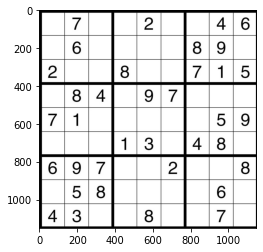

In [9]:
f=r"C:\Users\vansh\Downloads"

a="Sudoku.jpg"
print(a)
sudoku_a = cv2.imread(f+'\\'+a)
type(sudoku_a)
plt.figure()
plt.imshow(sudoku_a)
plt.show()

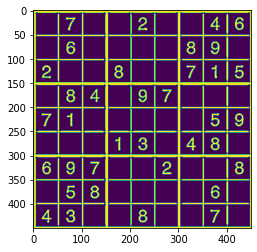

In [10]:
sudoku_a = cv2.resize(sudoku_a, (450,450))

def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)
plt.figure()
plt.imshow(threshold)
plt.show()

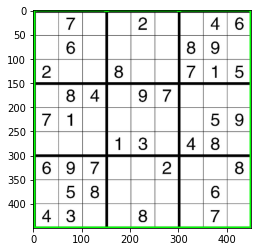

In [11]:
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

plt.figure()
plt.imshow(contour_1)
plt.show()

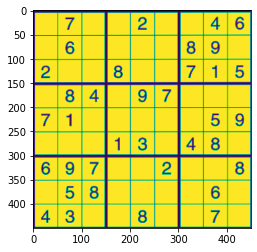

In [12]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

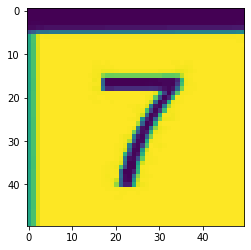

In [13]:
sudoku_cell = splitcells(imagewrap)
#Let's have alook at the last cell
plt.figure()
#plt.imshow(sudoku_cell[79])
plt.imshow(sudoku_cell[1])
plt.show()

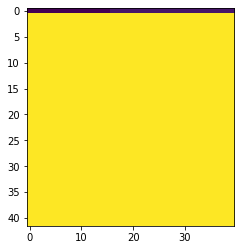

In [14]:
#cropping to avoid errors

def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)

plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()

In [15]:
def read_cells(cell,model):

    result = []
    for image in cell:
        #preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        
        #getting predictions and setting the values if probabilities are above 65% 
        predictions = model.predict(img)
        classIndex = model.predict_classes(img)
        probabilityValue = np.amax(predictions)
        
        if(probabilityValue > 0.65):
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

In [16]:
grid = np.reshape(grid,(9,9))
grid = grid.tolist()

In [17]:
grid

[[0, 7, 0, 0, 2, 0, 0, 4, 6],
 [0, 6, 0, 0, 0, 0, 8, 9, 0],
 [2, 0, 0, 8, 0, 0, 7, 1, 5],
 [0, 8, 4, 0, 9, 7, 0, 0, 0],
 [7, 1, 0, 0, 0, 0, 0, 5, 9],
 [0, 0, 0, 1, 3, 0, 4, 8, 0],
 [6, 9, 7, 0, 0, 2, 0, 0, 8],
 [0, 5, 8, 0, 0, 0, 0, 6, 0],
 [4, 3, 0, 0, 8, 0, 0, 7, 0]]

In [18]:
grid = [[grid[j][i] for j in range(9)] for i in range(9)]
d_grid=list(grid)

In [19]:
pygame.font.init()
screen = pygame.display.set_mode((502, 502))
pygame.display.set_caption("Sudoku Solver!")
font = pygame.font.SysFont("fantasy", 40)
x = 0
y = 0
dif = 500 / 9
val = 0

def get_cord(pos):
    global x
    x = pos[0] // dif
    global y
    y = pos[1] // dif

def draw_box():
    for i in range(2):
        pygame.draw.line(screen, ('gold'), ((x + i) * dif, y * dif - 500), ((x + i) * dif, y * dif + dif + (500-i*dif)), 2)
        pygame.draw.line(screen, ('red'), ((x + i) * dif, y * dif), ((x + i) * dif, y * dif + dif), 4)
        pygame.draw.line(screen, ('gold'), (x * dif - 500, (y + i) * dif), (x * dif + dif + 500, (y + i) * dif), 2)
        pygame.draw.line(screen, ('red'), (x * dif - 1, (y + i) * dif), (x * dif + dif + 1, (y + i) * dif), 4)

def draw():
    for i in range(9):
        for j in range(9):
            if grid[i][j] != 0:
                pygame.draw.rect(screen, ('lavender'), (i * dif, j * dif, dif + 1, dif + 1))
                text1 = font.render(str(grid[i][j]), 1, (0, 0, 0))
                screen.blit(text1, (i * dif + 15, j * dif + 15))

    for i in range(10):
        if i % 3 == 0:
            thick = 3
        else:
            thick = 1
        pygame.draw.line(screen, (0, 0, 0), (0, i * dif), (500, i * dif), thick)
        pygame.draw.line(screen, (0, 0, 0), (i * dif, 0), (i * dif, 500), thick)

def draw_val(val):
    text1 = font.render(str(val), 1, (0, 0, 0))
    screen.blit(text1, (x * dif + 15, y * dif + 15))

def valid(m, i, j, val):
    for it in range(9):
        if m[i][it] == val:
            return False
        if m[it][j] == val:
            return False
    it = i // 3
    jt = j // 3
    for i in range(it * 3, it * 3 + 3):
        for j in range(jt * 3, jt * 3 + 3):
            if m[i][j] == val:
                return False
    return True

def solve(grid, i, j):
    while grid[i][j] != 0:
        if(i < 8):
            i += 1
        elif(i == 8 and j < 8):
            i = 0
            j += 1
        elif(i == 8 and j == 8):
            return True
    pygame.event.pump()
    for it in range(1, 10):
        if(valid(grid, i, j, it) == True):
            grid[i][j] = it
            global x, y
            x = i
            y = j
            screen.fill(("misty rose"), rect=(0,0,500,500))
            draw()
            draw_box()
            pygame.display.update()
            pygame.time.delay(20)
            if(solve(grid, i, j) == 1):
                return True
            else:
                grid[i][j] = 0
            screen.fill(("white"), rect = (0,0, 500, 500))

            draw()
            draw_box()
            pygame.display.update()
            pygame.time.delay(50)
    return False

run = True
flag1 = 0
flag2 = 0

while run:
    screen.fill(('white'))
    for event in pygame.event.get():
        if(event.type == pygame.QUIT):
            run = False
        if(event.type == pygame.MOUSEBUTTONDOWN):
            flag1 = 1
            pos = pygame.mouse.get_pos()
            get_cord(pos)
        if(event.type == pygame.KEYDOWN):
            if(event.key == pygame.K_LEFT):
                x -= 1
                flag1 = 1
            if(event.key == pygame.K_RIGHT):
                x += 1
                flag1 = 1
            if(event.key == pygame.K_UP):
                y -= 1
                flag1 = 1
            if(event.key == pygame.K_DOWN):
                y += 1
                flag1 = 1
            if(event.key == pygame.K_1):
                val = 1
            if(event.key == pygame.K_2):
                val = 2
            if(event.key == pygame.K_3):
                val = 3
            if(event.key == pygame.K_4):
                val = 4
            if(event.key == pygame.K_5):
                val = 5
            if(event.key == pygame.K_6):
                val = 6
            if(event.key == pygame.K_7):
                val = 7
            if(event.key == pygame.K_8):
                val = 8
            if(event.key == pygame.K_9):
                val = 9
            if(event.key == pygame.K_RETURN):
                flag2 = 1
            if(event.key == pygame.K_r):
                flag2 = 0
                grid = [
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0]
                ]
    
            if(event.key == pygame.K_d):
                flag2 = 0
                grid = d_grid
    if(flag2 == 1):
        if solve(grid, 0, 0) == False:
            pass
        flag2 = 0
    if(val != 0):
        draw_val(val)
        if(valid(grid, int(x), int(y), val) == True):
            grid[int(x)][int(y)] = val
            flag1 = 0
        else:
            grid[int(x)][int(y)] = 0
    
        val = 0
    draw()
    if(flag1 == 1):
        draw_box()
    pygame.display.update()

pygame.quit()

# Thank You!